## Sport Injuries Data Exploration

### imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

date_cols = [2, 19, 20, 26, 29, 30]
injuries = pd.read_csv('data/injuries_cleaned.csv', parse_dates=date_cols)


### Dataframe Exploration

In [2]:
injuries_df = injuries.copy()
print(injuries_df.shape)
print(injuries_df.info())
injuries_df.head()

(6540, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6540 entries, 0 to 6539
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PlayerName                  6540 non-null   object        
 1   PlayerId                    6540 non-null   object        
 2   PlayerDOB                   6540 non-null   datetime64[ns]
 3   Height                      6540 non-null   float64       
 4   Weight                      6540 non-null   float64       
 5   Positions                   6540 non-null   object        
 6   GroupPosition               6540 non-null   object        
 7   DraftPick                   5864 non-null   float64       
 8   IsActive                    6540 non-null   bool          
 9   FirstSeason                 6540 non-null   float64       
 10  LastSeason                  6540 non-null   float64       
 11  SeasonsPlayed               6540 non-null   f

,PlayerName,PlayerId,PlayerDOB,Height,Weight,Positions,GroupPosition,DraftPick,IsActive,FirstSeason,...,DaysBetweenGames,BodyPartInjured,InjuryDescription,LastTransactionDate,LastTransactionDescription,LastTransactionType,approx_first_day,approx_last_day,remaining_days,log_days_injured
0,Steve Blake,blakest01,1980-02-26,75.0,172.0,Point Guard,G,38.0,False,2004.0,...,79.0,abdominal,surgery to repair torn abdominal muscle (out i...,2010-07-08,Signed as a free agent with the Los Angeles La...,Signing,2004-10-20,2016-04-15,1229.0,4.043051
1,Alan Anderson,anderal01,1982-10-16,78.0,220.0,"Small Forward, Shooting Guard",F,NaN,False,2006.0,...,203.0,abdominal,sore abdominal muscle (DNP),2013-07-30,Signed as a free agent with the Brooklyn Nets.,Signing,2006-10-20,2017-04-15,1100.0,5.303305
2,Arron Afflalo,afflaar01,1985-10-15,77.0,210.0,"Small Forward, Shooting Guard",G,27.0,False,2008.0,...,5.0,abdominal,strained right abdominal muscle (DTD),2015-07-09,Signed a multi-year contract with the New York...,Signing,2008-10-20,2018-04-15,767.0,1.386294
3,Bobby Simmons,simmobo01,1980-06-02,79.0,210.0,"Power Forward, Small Forward, Shooting Guard",F,41.0,False,2002.0,...,17.0,abdominal,strained abdominal muscle (DNP),2008-06-26,Traded by the Milwaukee Bucks with Yi Jianlian...,Trade,2002-10-20,2012-04-15,1167.0,2.639057
4,D.J. Augustine,augusdj01,1987-11-10,71.0,183.0,Point Guard,G,9.0,True,2009.0,...,27.0,abdominal,strained abdominal muscle (out indefinitely),2008-06-26,Drafted by the Charlotte Bobcats in the 1st ro...,Draft,2009-10-20,2020-04-15,4112.0,3.258097


In [3]:
injuries['DaysInjured'].describe()


count    6540.000000
mean       48.853976
std       101.482648
min         1.000000
25%         2.000000
50%         6.000000
75%        28.000000
max      1766.000000
Name: DaysInjured, dtype: float64

In [ ]:
### Number of Injuries by Categories

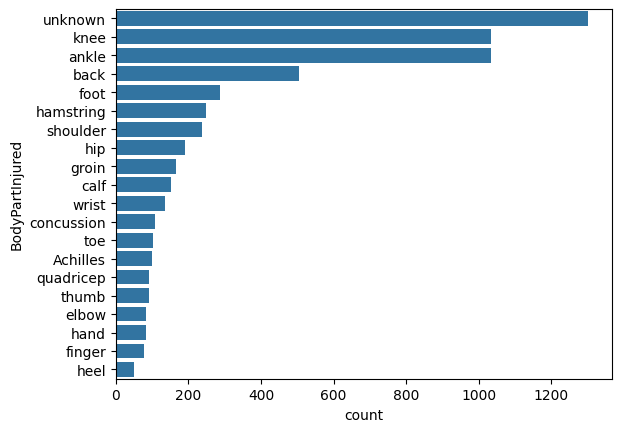

In [4]:
def injuries_dist_cat(col):
    count_df = injuries_df[col].value_counts().head(20)
    sns.barplot(x=count_df, y=count_df.index)
    plt.show()


injuries_dist_cat('BodyPartInjured')


### Numeric Ditributions

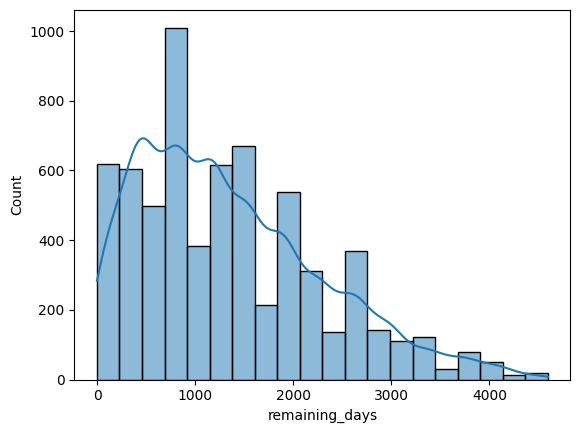

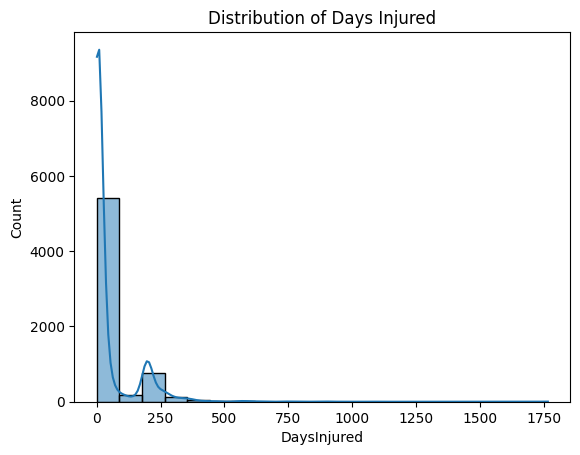

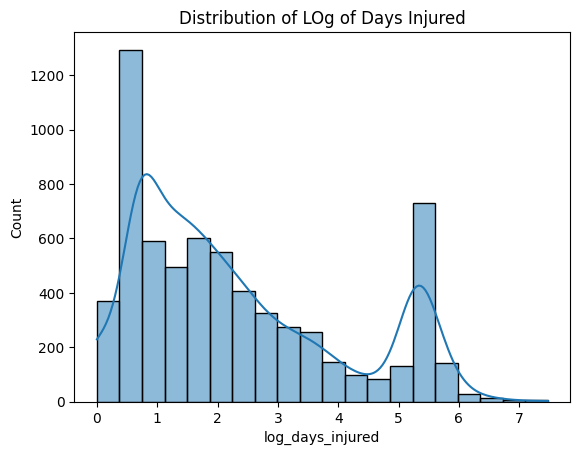

In [6]:
def injuries_dist_num(col):
    sns.histplot(data=injuries_df, x=col, bins=20, kde=True)
    plt.show()

injuries_dist_num('remaining_days')

sns.histplot(data=injuries_df, x='DaysInjured', bins=20, kde=True)
plt.title('Distribution of Days Injured')
plt.show() 

sns.histplot(data=injuries_df, x='log_days_injured', bins=20, kde=True)
plt.title('Distribution of LOg of Days Injured')
plt.show() 


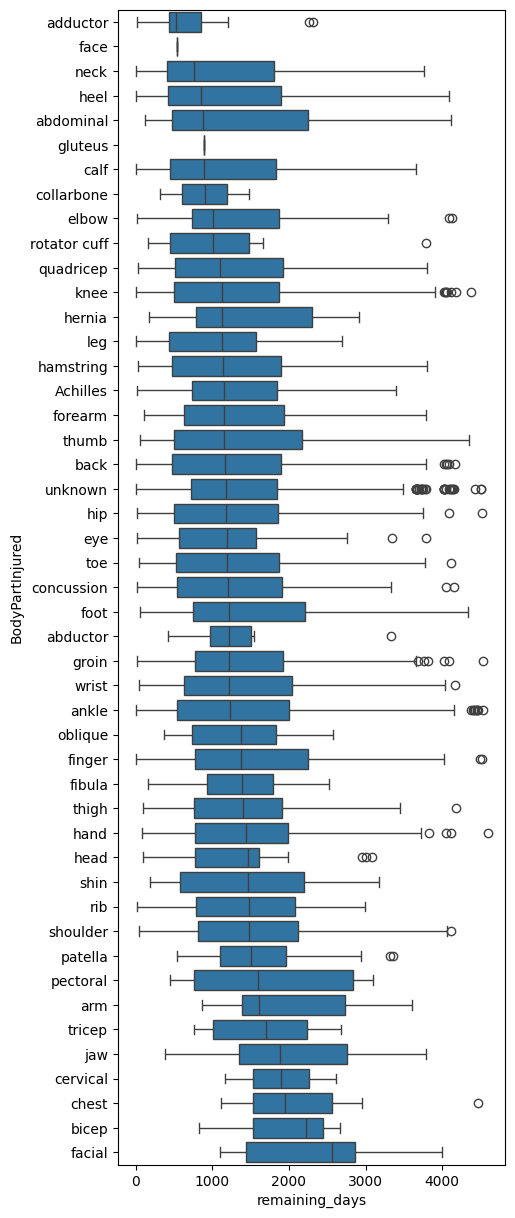

In [8]:
order = injuries_df.groupby('BodyPartInjured').remaining_days.median().sort_values(ascending=True).index
injuries_df['BodyPartInjured'].value_counts().head(10)

plt.figure(figsize=(5, 15))
sns.boxplot(data=injuries_df, y='BodyPartInjured', x='remaining_days', order=order)
plt.show()

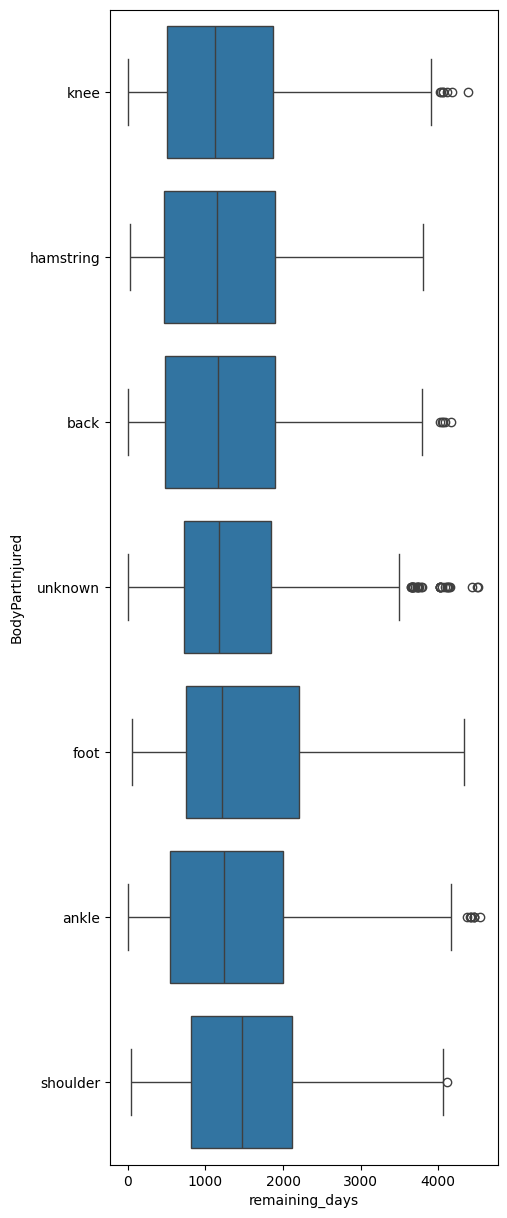

BodyPartInjured
unknown         1302
knee            1035
ankle           1033
back             504
foot             288
hamstring        248
shoulder         237
hip              191
groin            165
calf             153
wrist            135
concussion       109
toe              103
Achilles          99
quadricep         91
thumb             90
elbow             84
hand              84
finger            78
heel              51
thigh             50
leg               49
rib               39
neck              38
eye               34
head              33
patella           29
abdominal         28
adductor          24
shin              19
hernia            15
fibula            14
facial            10
rotator cuff      10
chest              9
abductor           8
oblique            8
jaw                8
arm                7
forearm            7
pectoral           6
tricep             6
bicep              3
collarbone         2
cervical           2
face               1
gluteus           

In [9]:
part_counts = injuries_df['BodyPartInjured'].value_counts()
high_count = part_counts.index[part_counts >= 200]
high_count_df = injuries_df[injuries_df['BodyPartInjured'].isin(high_count)]
order = high_count_df.groupby('BodyPartInjured').remaining_days.median().sort_values(ascending=True).index

plt.figure(figsize=(5, 15))
sns.boxplot(data=high_count_df, y='BodyPartInjured', x='remaining_days', order=order)
plt.show()
injuries_df['BodyPartInjured'].value_counts()